In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tcn.tcn import TCN
from tensorflow import keras

from sklearn.metrics import mean_squared_error


In [2]:
# data
maxtempe = pd.read_csv("maxtempe.csv")
mintempe = pd.read_csv("mintempe.csv")
precip = pd.read_csv("precip.csv")
winddir = pd.read_csv("winddir.csv")
windspeed = pd.read_csv("windspeed.csv")

maxtempe['Datetime'] = pd.to_datetime(maxtempe.Datetime, format='%Y/%m/%d')
mintempe['Datetime'] = pd.to_datetime(mintempe.Datetime, format='%Y/%m/%d')
precip['Datetime'] = pd.to_datetime(precip.Datetime, format='%Y/%m/%d')
winddir['Datetime'] = pd.to_datetime(winddir.Datetime, format='%Y/%m/%d')
windspeed['Datetime'] = pd.to_datetime(windspeed.Datetime, format='%Y/%m/%d')

# train = np.asarray(df_train.iloc[:,1])
# test = np.asarray(df_test.iloc[:,1])
# 此时train和test都是ndarray

In [3]:
# 定义几个全局变量
window_size = 10   # 窗口大小
batch_size = 32    # 训练批次大小
epochs = 200       # 训练epoch，暂时改成20了，为了快点看到这样魔改是否能跑通
filter_nums = 10   # filter数量
kernel_size = 4    # kernel大小

sep = int(maxtempe.shape[0]*0.8)

In [4]:
def get_dataset():
    # data = [maxtempe,mintempe,precip,winddir,windspeed]
    data = [maxtempe,mintempe]
    open_arr=[]
    
    # scaler = MinMaxScaler()  #归一化
    scaler=[]  # 一个数据一个scaler

    for i in range(len(data)):
        scaler.append(MinMaxScaler())
        open_arr.append(scaler[i].fit_transform(np.asarray(data[i].iloc[:,1]).reshape(-1, 1)).reshape(-1))
    
    X = np.zeros(shape=(len(open_arr[0])-window_size, len(open_arr)*window_size))  # 长是len-10，宽是[指标数]*10；
    label = np.zeros(shape=(len(open_arr[0])-window_size))  # 长是len-10
    for i in range(len(open_arr[0])-window_size):
        for j in range(len(open_arr)):
            X[i,j*window_size:(j+1)*window_size] = open_arr[j][i:i+window_size]  # X第i行 = 原数据i到i+10（取不到10）的值
        label[i] = open_arr[0][i+window_size]  # label[i] = 原数据i+10的值，X正好取不到
        # 暂时预测最高温
    
    train_X = X[:sep, :]  # 前面的数据用来训练
    train_label = label[:sep]
    test_X = X[sep-window_size:, :]  # 后面的数据用来测试
    test_label = label[sep-window_size:]
    return train_X, train_label, test_X, test_label, scaler


In [5]:
train_X, train_label, test_X, test_label, scaler = get_dataset()

In [6]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(window_size*2, 1)),    # window_size*2的2是open_arr的长
    TCN(nb_filters=filter_nums,     # 滤波器的个数，类比于units
        kernel_size=kernel_size,    # 卷积核的大小
        dilations=[1, 2, 4, 8]),    # 空洞因子
    keras.layers.Dense(units=1, activation='relu')
])
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.fit(train_X, train_label, validation_split=0.2, epochs=epochs)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 10)                2940      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 2,951
Trainable params: 2,951
Non-tr

72/72 [==============================] - 1s 12ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 52/200
72/72 [==============================] - 1s 12ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 53/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 54/200
72/72 [==============================] - 1s 13ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 55/200
72/72 [==============================] - 1s 12ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 56/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 57/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 58/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0046 

72/72 [==============================] - 1s 11ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 113/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 114/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 115/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 116/200
72/72 [==============================] - 1s 11ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 117/200
72/72 [==============================] - 1s 12ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 118/200
72/72 [==============================] - ETA: 0s - loss: 0.0042 - mse: 0.004 - 1s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 119/200
72/72 [=================

72/72 [==============================] - 2s 28ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 173/200
72/72 [==============================] - 2s 23ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0039 - val_mse: 0.0039 loss: 0.0038 
Epoch 174/200
72/72 [==============================] - 2s 24ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0038 - val_mse: 0.0038A: 0s - loss: 0.0041 
Epoch 175/200
72/72 [==============================] - 2s 22ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 176/200
72/72 [==============================] - 2s 22ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 177/200
72/72 [==============================] - 1s 20ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 178/200
72/72 [==============================] - 2s 21ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 179/200
72/72 [====================

In [7]:
model.evaluate(test_X, test_label)

fit = model.predict(train_X)

prediction = model.predict(test_X)
tcn_pre = scaler[0].inverse_transform(prediction.reshape(-1, 1)).reshape(-1)
tcn_fit = scaler[0].inverse_transform(fit.reshape(-1, 1)).reshape(-1)
# 反变换
print('mse of TCN: ', mean_squared_error(tcn_pre,np.asarray(maxtempe.iloc[sep:,1])))
# 40.37560160903517

23/23 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0043
mse of TCN:  40.37560160903517


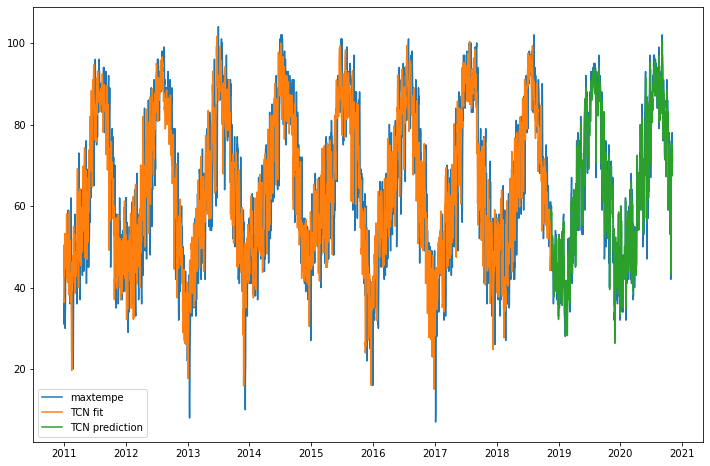

In [8]:
plt.figure(figsize=(12, 8))  # large picture
plt.plot(maxtempe.Datetime,maxtempe.iloc[:,1], label='maxtempe')
plt.plot(maxtempe.Datetime[:sep], tcn_fit, label='TCN fit')
plt.plot(maxtempe.Datetime[sep:], tcn_pre, label='TCN prediction')
plt.legend()

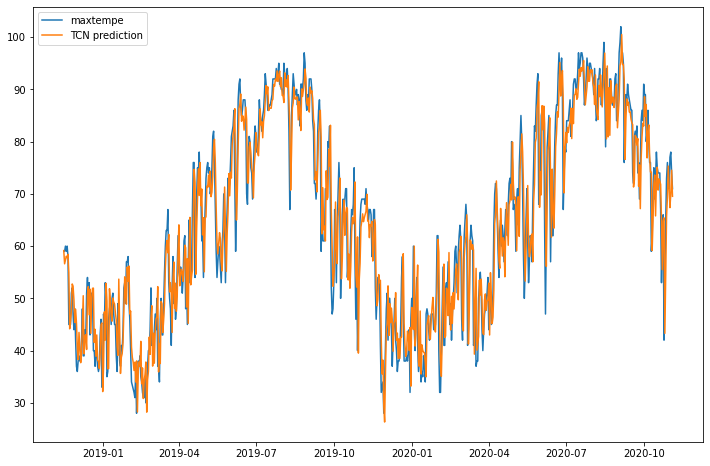

In [9]:
# 这个图只有预测的部分
plt.figure(figsize=(12, 8))  # large picture
plt.plot(maxtempe.Datetime[sep:],maxtempe.iloc[:,1][sep:], label='maxtempe')
# plt.plot(maxtempe.Datetime[:sep], tcn_fit, label='TCN fit')
plt.plot(maxtempe.Datetime[sep:], tcn_pre, label='TCN prediction')
plt.legend()

In [10]:
pd.DataFrame(np.concatenate([tcn_fit,tcn_pre])).to_csv('result_TCN_tempe.csv',index = False)
# 预测的结果，有预测值和拟合值